In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#To verify if raster accurately reflects VIIRS fire detections

In [3]:
# Load fire raster (generated)
fire = xr.open_dataset(r"C:\Users\Ankit\Downloads\codes\viirs_binary_fire_2015_2016.nc")
times = pd.to_datetime(fire.time.values)
test_time = pd.Timestamp("2015-01-01 20:00")

In [4]:
# Load original VIIRS points
viirs = pd.read_csv(r"C:\Users\Ankit\Downloads\filtered_viirs.csv")
viirs["acq_time"] = viirs["acq_time"].astype(str).str.zfill(4)
viirs["datetime"] = pd.to_datetime(viirs["acq_date"] + " " + viirs["acq_time"].str[:2] + ":00")
fire_points = viirs[viirs["datetime"] == test_time]

In [5]:
# Plot raster with VIIRS overlay
fire_slice = fire.fire_label.sel(time=test_time)

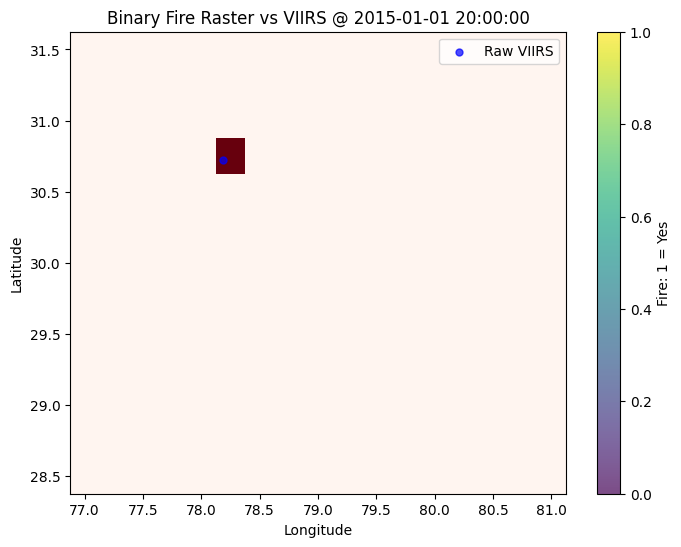

In [6]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(fire.longitude, fire.latitude, fire_slice, cmap='Reds', shading='auto')
plt.scatter(fire_points["longitude"], fire_points["latitude"], color='blue', label='Raw VIIRS', s=25, alpha=0.7)
plt.title(f"Binary Fire Raster vs VIIRS @ {test_time}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label='Fire: 1 = Yes')
plt.legend()
plt.show()